### Plotly Basics

<img src="plotly_image.png">

https://plotly.com/

Python Plotly Library is an open-source library that can be used for data visualization and understanding data simply and easily. Plotly supports various types of plots like line charts, scatter plots, histograms, cox plots, etc

In [1]:
! pip install plotly
! pip install openpyxl


In [2]:
import plotly.offline as pyo
import pandas as pd


In [3]:
orders = pd.read_excel(r'sales.xlsx', sheet_name="Orders", engine='openpyxl')


In [4]:
orders.head()


,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
0,1,3,2010-10-13,Low,6,261.5400,0.04,Regular Air,-213.2500,38.94,...,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-10-20
1,49,293,2012-10-01,High,49,10123.0200,0.07,Delivery Truck,457.8100,208.16,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,2012-10-02
2,50,293,2012-10-01,High,27,244.5700,0.01,Regular Air,46.7075,8.69,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,2012-10-03
3,80,483,2011-07-10,High,30,4965.7595,0.08,Regular Air,1198.9710,195.99,...,Clay Rozendal,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,0.58,2011-07-12
4,85,515,2010-08-28,Not Specified,19,394.2700,0.08,Regular Air,30.9400,21.78,...,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,2010-08-30


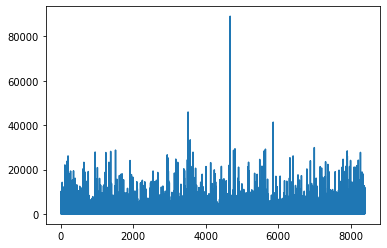

In [5]:
import matplotlib.pyplot as plt
plt.plot(orders['Sales'])


In [6]:
pyo.plot([{'x': orders.index,
           'y': orders['Sales']}],
         filename='basic_plot_one.html')


'basic_plot_one.html'

In [7]:
orders_sf = orders[['Sales', 'Profit']]
orders_sf.head()


,Sales,Profit
0,261.5400,-213.2500
1,10123.0200,457.8100
2,244.5700,46.7075
3,4965.7595,1198.9710
4,394.2700,30.9400


In [8]:

pyo.plot([{'x': orders_sf.index,
           'y': orders_sf[col],
           'name': col} for col in orders_sf.columns],
         filename='basic_plot_two.html')


'basic_plot_two.html'

### Scatter Plot

In [9]:
import plotly.graph_objs as go


In [10]:
pyo.plot([go.Scatter(x=orders_sf.Sales,
                     y=orders_sf.Profit,
                     mode='markers',
                     marker=dict(
                         size=14,
                         color='rgb(120, 150, 180)',
                         symbol='circle',
                         line=dict(
                             width=2
                         )))],
         filename='basic_plot_three.html')


'basic_plot_three.html'

In [11]:
scatter_data = [go.Scatter(x=orders_sf.Sales,
                           y=orders_sf.Profit,
                           mode='markers',
                           marker=dict(
                               size=14,
                               color='rgb(120, 150, 180)',
                               symbol='circle',
                               line=dict(
                                   width=2
                               )))]


In [12]:
scatter_layout = go.Layout(title='Sales vs Profit Chart',
                           xaxis=dict(title='Sales in thousands'),
                           yaxis=dict(title='Profit in thousands'),
                           hovermode='closest')


In [13]:
figure = go.Figure(data=scatter_data, layout=scatter_layout)


In [14]:
pyo.plot(figure, filename='basic_plot_four.html')


'basic_plot_four.html'

### bar chart

In [15]:
order_priority = orders.groupby('Order Priority')['Sales'].sum()
order_priority.head()


Order Priority
Critical         2.724799e+06
High             3.267356e+06
Low              3.282630e+06
Medium           2.862452e+06
Not Specified    2.778363e+06
Name: Sales, dtype: float64

In [16]:
bar_data = [go.Bar(x=order_priority.index,
                   y=order_priority.values)]


In [17]:
bar_layout = go.Layout(title='Sales by Order Priority')


In [18]:
bar_figure = go.Figure(data=bar_data, layout=bar_layout)


In [19]:
pyo.plot(bar_figure, filename='basic_plot_five.html')


'basic_plot_five.html'

### Line Chart

In [20]:
orders['Order Date'] = pd.to_datetime(orders['Order Date'])
orders['Year'] = orders['Order Date'].dt.year


In [21]:
orders.head()


,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date,Year
0,1,3,2010-10-13,Low,6,261.5400,0.04,Regular Air,-213.2500,38.94,...,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-10-20,2010
1,49,293,2012-10-01,High,49,10123.0200,0.07,Delivery Truck,457.8100,208.16,...,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,2012-10-02,2012
2,50,293,2012-10-01,High,27,244.5700,0.01,Regular Air,46.7075,8.69,...,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,2012-10-03,2012
3,80,483,2011-07-10,High,30,4965.7595,0.08,Regular Air,1198.9710,195.99,...,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,0.58,2011-07-12,2011
4,85,515,2010-08-28,Not Specified,19,394.2700,0.08,Regular Air,30.9400,21.78,...,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,2010-08-30,2010


In [22]:
orders_sales = orders.groupby(['Year'])['Sales'].sum()


In [23]:
orders_sales.head()


Year
2009    4.209139e+06
2010    3.549681e+06
2011    3.436817e+06
2012    3.719964e+06
Name: Sales, dtype: float64

In [24]:
data_sales = [go.Scatter(x=orders_sales.index,
                         y=orders_sales.values, mode='lines')]


In [25]:
layout_sales = go.Layout(title='Sales by Year')


In [26]:
figure_sales = go.Figure(data=data_sales, layout=layout_sales)


In [27]:
pyo.plot(figure_sales, filename='basic_plot_six.html')


'basic_plot_six.html'

In [28]:
orders_profit = orders.groupby(['Year'])['Profit'].sum()


In [29]:
orders_profit.head()


Year
2009    434538.785435
2010    363871.378527
2011    381455.986224
2012    341901.809395
Name: Profit, dtype: float64

In [30]:
data_profit = [go.Scatter(x=orders_profit.index,
                          y=orders_profit.values, mode='lines')]


In [31]:
layout_profit = go.Layout(title='profit by Year')


In [32]:
figure_profit = go.Figure(data=data_profit, layout=layout_profit)


In [33]:
pyo.plot(figure_profit, filename='basic_plot_seven.html')


'basic_plot_seven.html'

In [34]:
orders_sales_profit = orders[['Year', 'Sales', 'Profit']].groupby([
                                                                  'Year']).sum()


In [35]:
orders_sales_profit.head()


,Sales,Profit
Year,,
2009,4.209139e+06,434538.785435
2010,3.549681e+06,363871.378527
2011,3.436817e+06,381455.986224
2012,3.719964e+06,341901.809395


### Multiple Line Charts

In [36]:
trace0 = go.Scatter(x=orders_sales_profit.index,
                    y=orders_sales_profit.Sales, mode='lines+markers', name='Sales')


In [37]:
trace1 = go.Scatter(x=orders_sales_profit.index,
                    y=orders_sales_profit.Profit, mode='lines+markers', name='Profit')


In [38]:
data_sales_profit = [trace0, trace1]


In [39]:
layout_sales_profit = go.Layout(title='profit and Sales by Year')


In [40]:
figure_sales_profit = go.Figure(
    data=data_sales_profit, layout=layout_sales_profit)


In [41]:
pyo.plot(figure_sales_profit, filename='basic_plot_eight.html')


'basic_plot_eight.html'

### Automate multiple lines on the line chart

In [42]:
orders_pivot = pd.pivot_table(
    orders, values=['Sales', 'Profit'], columns='Year')


In [43]:
traces = [go.Scatter(
    x=orders_pivot.columns,
    y=orders_pivot.loc[row],
    mode='lines+markers',
    name=row) for row in orders_pivot.index]


In [44]:
data = traces


In [45]:
layout = go.Layout(title='Sales and Profit by Year')


In [46]:
figure = go.Figure(data=data, layout=layout)


In [47]:
pyo.plot(figure, filename='basic_plot_nine.html')


'basic_plot_nine.html'

### Group bar chart

In [48]:
data = [go.Bar(x=orders_sales.index, y=orders_sales.values)]
layout = go.Layout(title='Sales by Year')
figure = go.Figure(data=data, layout=layout)
pyo.plot(figure, filename='basic_plot_ten.html')


'basic_plot_ten.html'

In [49]:
orders_pivot = pd.pivot_table(orders, values=['Sales', 'Profit'], index='Year')


In [50]:
orders_pivot.head()


,Profit,Sales
Year,,
2009,201.829441,1955.011359
2010,169.874593,1657.180581
2011,190.537456,1716.691659
2012,162.655475,1769.725910


In [51]:
trace0 = go.Bar(x=orders_sales_profit.index,
                y=orders_sales_profit.Sales, name='Sales')
trace1 = go.Bar(x=orders_sales_profit.index,
                y=orders_sales_profit.Profit, name='Profit')
data_sales_profit = [trace0, trace1]
layout_sales_profit = go.Layout(title='profit and Sales by Year')
figure_sales_profit = go.Figure(
    data=data_sales_profit, layout=layout_sales_profit)
pyo.plot(figure_sales_profit, filename='basic_plot_eleven.html')


'basic_plot_eleven.html'

### Stack bar chart

In [52]:
trace0 = go.Bar(x=orders_sales_profit.index,
                y=orders_sales_profit.Sales, name='Sales')
trace1 = go.Bar(x=orders_sales_profit.index,
                y=orders_sales_profit.Profit, name='Profit')
data_sales_profit = [trace0, trace1]
layout_sales_profit = go.Layout(
    title='profit and Sales by Year', barmode='stack')
figure_sales_profit = go.Figure(
    data=data_sales_profit, layout=layout_sales_profit)
pyo.plot(figure_sales_profit, filename='basic_plot_twelve.html')


'basic_plot_twelve.html'

### bar and line combo chart

In [53]:
trace0 = go.Bar(x=orders_sales_profit.index,
                y=orders_sales_profit.Sales, name='Sales')
trace1 = go.Scatter(x=orders_sales_profit.index,
                    y=orders_sales_profit.Profit, mode='markers+lines', name='Profit')
data_sales_profit = [trace0, trace1]
layout_sales_profit = go.Layout(title='profit and Sales by Year')
figure_sales_profit = go.Figure(
    data=data_sales_profit, layout=layout_sales_profit)
pyo.plot(figure_sales_profit, filename='basic_plot_thirteen.html')


'basic_plot_thirteen.html'

### Bubble chart

In [54]:
orders.head()


,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date,Year
0,1,3,2010-10-13,Low,6,261.5400,0.04,Regular Air,-213.2500,38.94,...,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-10-20,2010
1,49,293,2012-10-01,High,49,10123.0200,0.07,Delivery Truck,457.8100,208.16,...,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,2012-10-02,2012
2,50,293,2012-10-01,High,27,244.5700,0.01,Regular Air,46.7075,8.69,...,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,2012-10-03,2012
3,80,483,2011-07-10,High,30,4965.7595,0.08,Regular Air,1198.9710,195.99,...,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,0.58,2011-07-12,2011
4,85,515,2010-08-28,Not Specified,19,394.2700,0.08,Regular Air,30.9400,21.78,...,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,2010-08-30,2010


In [55]:
data = [go.Scatter(x=orders['Sales'],
                   y=orders['Profit'],
                   text=orders['Customer Name'],
                   mode='markers',
                   marker=dict(size=100 * orders['Discount']))]


In [56]:
layout = go.Layout(title='Sales and Profit',
                   xaxis=dict(title='Sales'),
                   yaxis=dict(title='Profit'),
                   hovermode='closest')


In [57]:
figure = go.Figure(data=data, layout=layout)


In [58]:
pyo.plot(figure, filename='basic_plot_fourteen.html')


'basic_plot_fourteen.html'

### bubble chart by categories

In [59]:
trace0 = go.Scatter(x=orders['Sales'][orders['Order Priority'] == 'High'],
                    y=orders['Profit'][orders['Order Priority'] == 'High'],
                    name='High',
                    mode='markers',
                    marker=dict(size=100 * orders['Discount'][orders['Order Priority'] == 'High']))
trace1 = go.Scatter(x=orders['Sales'][orders['Order Priority'] == 'Medium'],
                    y=orders['Profit'][orders['Order Priority'] == 'Medium'],
                    name='Medium',
                    mode='markers',
                    marker=dict(size=100 * orders['Discount'][orders['Order Priority'] == 'Medium']))
trace2 = go.Scatter(x=orders['Sales'][orders['Order Priority'] == 'Low'],
                    y=orders['Profit'][orders['Order Priority'] == 'Low'],
                    name='Low',
                    mode='markers',
                    marker=dict(size=100 * orders['Discount'][orders['Order Priority'] == 'Low']))


In [60]:
data = [trace0, trace1, trace2]


In [61]:
layout = go.Layout(title='Sales and Profit',
                   xaxis=dict(title='Sales'),
                   yaxis=dict(title='Profit'),
                   hovermode='closest')


In [62]:
figure = go.Figure(data=data, layout=layout)


In [63]:
pyo.plot(figure, filename='basic_plot_fifteen.html')


'basic_plot_fifteen.html'

### Histogram chart

In [64]:
orders.head()


,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date,Year
0,1,3,2010-10-13,Low,6,261.5400,0.04,Regular Air,-213.2500,38.94,...,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-10-20,2010
1,49,293,2012-10-01,High,49,10123.0200,0.07,Delivery Truck,457.8100,208.16,...,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,2012-10-02,2012
2,50,293,2012-10-01,High,27,244.5700,0.01,Regular Air,46.7075,8.69,...,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,2012-10-03,2012
3,80,483,2011-07-10,High,30,4965.7595,0.08,Regular Air,1198.9710,195.99,...,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,0.58,2011-07-12,2011
4,85,515,2010-08-28,Not Specified,19,394.2700,0.08,Regular Air,30.9400,21.78,...,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,2010-08-30,2010


In [65]:
trace0 = go.Histogram(x=orders['Sales'],
                      name='Sales',
                      opacity=0.75)

trace1 = go.Histogram(x=orders['Profit'],
                      name='Profit',
                      opacity=0.75)


In [66]:
data = [trace0, trace1]


In [67]:
layout = go.Layout(title='Sales and Profit')


In [68]:
figure = go.Figure(data=data, layout=layout)


In [69]:
pyo.plot(figure, filename='basic_plot_sixteen.html')


'basic_plot_sixteen.html'

### Boxplot

In [70]:
orders.head()


,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date,Year
0,1,3,2010-10-13,Low,6,261.5400,0.04,Regular Air,-213.2500,38.94,...,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-10-20,2010
1,49,293,2012-10-01,High,49,10123.0200,0.07,Delivery Truck,457.8100,208.16,...,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,2012-10-02,2012
2,50,293,2012-10-01,High,27,244.5700,0.01,Regular Air,46.7075,8.69,...,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,2012-10-03,2012
3,80,483,2011-07-10,High,30,4965.7595,0.08,Regular Air,1198.9710,195.99,...,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,0.58,2011-07-12,2011
4,85,515,2010-08-28,Not Specified,19,394.2700,0.08,Regular Air,30.9400,21.78,...,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,2010-08-30,2010


In [71]:
orders['Customer Segment'].value_counts()


Corporate         3076
Home Office       2032
Consumer          1649
Small Business    1642
Name: Customer Segment, dtype: int64

In [72]:
corp = orders.Sales[orders['Customer Segment'] == 'Corporate']
ho = orders.Sales[orders['Customer Segment'] == 'Home Office']
cons = orders.Sales[orders['Customer Segment'] == 'Consumer']
smb = orders.Sales[orders['Customer Segment'] == 'Small Business']


In [73]:
trace0 = go.Box(y=corp, name='Corporate')
trace1 = go.Box(y=ho, name='Home Office')
trace2 = go.Box(y=cons, name='Consumer')
trace3 = go.Box(y=smb, name='Small Business')


In [74]:
data = [trace0, trace1, trace2, trace3]


In [75]:
layout = go.Layout(title='Distribution of Sales by Customer Segment')


In [76]:
figure = go.Figure(data=data, layout=layout)


In [77]:
pyo.plot(figure, filename='basic_plot_seventeen.html')


'basic_plot_seventeen.html'

### Scatter Plot Matrix

In [78]:
import plotly.figure_factory as ff
import numpy as np


In [79]:
orders_data = orders.loc[:, ['Sales', 'Profit', 'Discount']]


In [80]:
orders_data['index'] = np.arange(1, len(orders_data) + 1)


In [81]:
figure = ff.create_scatterplotmatrix(orders_data,
                                     index='index',
                                     diag='box',
                                     colormap='Portland',
                                     colormap_type='cat')


In [82]:
pyo.plot(figure, filename='basic_plot_eighteen.html')


'basic_plot_eighteen.html'

In [83]:
orders_data = orders.loc[:, ['Sales', 'Profit', 'Discount', 'Order Priority']]


In [84]:
orders_data['index'] = np.arange(1, len(orders_data) + 1)


In [85]:
figure = ff.create_scatterplotmatrix(orders_data,
                                     index='index',
                                     diag='box',
                                     colormap='Portland',
                                     colormap_type='cat')


In [86]:
pyo.plot(figure, filename='basic_plot_nineteen.html')


'basic_plot_nineteen.html'